# Linear Regression with Statsmodels and Scikit-Learn

There are many ways to fit a linear regression and in python I find myself commonly using both
[scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html) and [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html). This notebook demos some common tasks using these libraries:
* Linear regressions in both
* Using [dummy variables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
* Multilinear regression
* Quadratic and polynomial regressions
* Exponential regressions

You can also create [polynomial fits with numpy](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and more [general curve fits with scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

To get started let's load in the libraries that we'll need.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model

For the first few examples we'll use the famous [Iris dataset](http://archive.ics.uci.edu/ml/datasets/Iris). Seaborn provides a few data sets including this one. Let's load the data and take a quick look using [Seaborn's pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html).

In [2]:
# Load the data into a pandas dataframe
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


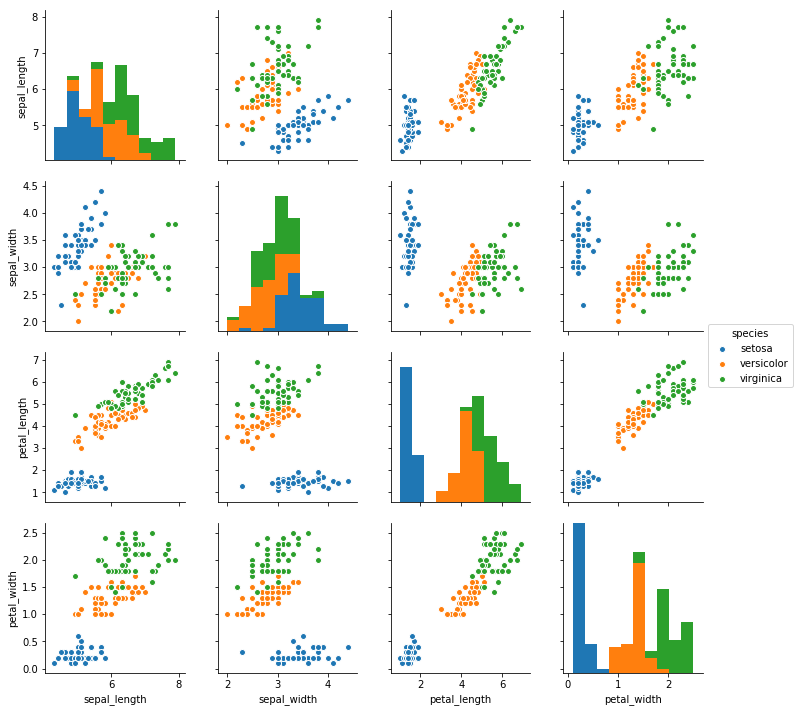

In [5]:
# Quick plot of the data using seaborn
sns.pairplot(iris, hue="species")

You can see a pretty strong linear relationship between `petal_length` and `petal_width`. Let's fit a linear regression. Seaborn can [plot the data with a regression line](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html) so let's do that first (but it doesn't give us much in the way of statistics).

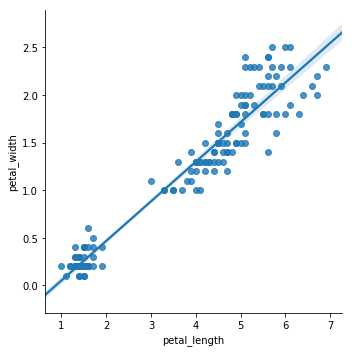

In [10]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)
# petal width = B0 + b1*petal_length + e

Now let's use scikit-learn to find the best fit line.

In [14]:
# from sklearn import linear_model

X = iris[["petal_length"]]
y = iris["petal_width"]

# Fit the linear model
model = linear_model.LinearRegression() #this creates a linear regression object
results = model.fit(X, y) #this fits the model and runs the regression
#model = linear_model.LinearRegression().fit(X,y)     # this does two steps above in one

# Print the coefficients
print (results.intercept_, results.coef_)

-0.3630755213190291 [0.41575542]


This means that our best fit line is:
$$y = a + b x$$
where $a = -0.363075521319$ and $b = 0.41575542$.

Next let's use `statsmodels`.

In [15]:
# import statsmodels.api as sm

# Note the swap of X and y
model = smf.ols(formula = 'petal_width ~ petal_length', data=iris)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           4.68e-86
Time:                        20:02:46   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

interpretation: for every one unit increase in petal_length, petal_width goes up by beta 1, which is 0.4158

Note that the coefficients are almost identical to what we saw before with scikit-learn, and the fit is pretty good ($R^2=0.927$). Let's see if adding in the species helps. Since that feature is categorical, we need to use dummy variables.

In [10]:
dummies = pd.get_dummies(iris["species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


Now we perform a multilinear regression with the dummy variables added.

In [12]:
model = smf.ols(formula = 'petal_width ~ petal_length + setosa + versicolor + virginica', data = iris)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           4.88e-92
Time:                        19:49:36   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2501      0.098      2.561      0.011       0.057       0.443
petal_length     0.2304      0.034      6.691      0.000       0.162       0.298
setosa          -0.3410      0.051     -6.655      0.000      -0.442      -0.240
versicolor       0.0944      0.054      1.751      0.082      -0.012       0.201
virginica        0.4967      0.096      5.150      0.000       0.306       0.687
==============================================================================
Omnibus:                        6.210   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                9.578
Skew:                          -0.110   Prob(JB):                      0.00832
Kurtosis:                       4.218   Cond. No.                     1.27e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In this case it looks like we got a slight improvement from including the dummy variables. The dummy variables have a bigger impact on a fit between `petal_length` and `sepal_length`.

In [15]:
## Here is a worse notation from statsmodels that you can also use - I highly recommend the first 
import statsmodels.api as sm

X = iris[["petal_length"]]
X = sm.add_constant(X)
y = iris["sepal_length"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.04e-47
Time:                        19:51:04   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3066      0.078     54.939      0.000       4.152       4.462
petal_length     0.4089      0.019     21.646      0.000       0.372       0.446
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.346
Skew:                           0.069   Prob(JB):                        0.841
Kurtosis:                       2.809   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = iris[["petal_length", "setosa", "versicolor", "virginica"]]
y = iris["sepal_length"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.4
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           3.10e-57
Time:                        19:51:11   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             104.2
Df Residuals:                     146   BIC:                             116.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.9046      0.065     13.962      0.000       0.777       1.033
setosa           3.6835      0.106     34.719      0.000       3.474       3.893
versicolor       2.0826      0.280      7.435      0.000       1.529       2.636
virginica        1.5659      0.363      4.315      0.000       0.849       2.283
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.672
Skew:                           0.140   Prob(JB):                        0.715
Kurtosis:                       2.830   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Quadratic Fit

Next we look at a data set that needs a quadratic fit. Let's do both a linear and quadratic fit and compare.

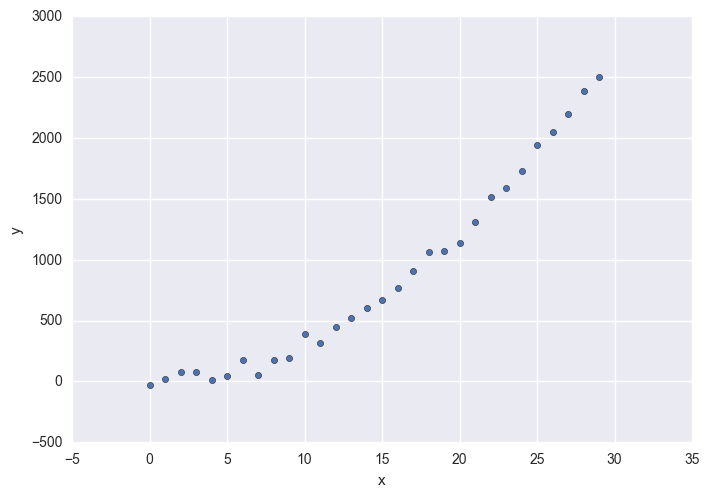

In [22]:
func = lambda x: 2 + 0.5 * x + 3 * x ** 2 + 5 * stats.norm.rvs(0, 10)
df = pd.DataFrame()
df["x"] = list(range(0, 30))
df["y"] = list(map(func, df["x"]))
df.plot(x='x', y='y', kind='scatter')

In [23]:
# Linear Fit
model = smf.ols('y~x', data = df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     376.0
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           9.12e-18
Time:                        19:53:02   Log-Likelihood:                -202.54
No. Observations:                  30   AIC:                             409.1
Df Residuals:                      28   BIC:                             411.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -407.3768     76.302     -5.339      0.000    -563.674    -251.079
x             87.6157      4.518     19.391      0.000      78.360      96.871
==============================================================================
Omnibus:                        6.085   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                3.052
Skew:                           0.535   Prob(JB):                        0.217
Kurtosis:                       1.862   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Quadratic Fit
df['x2'] = df['x']**2

model2 = smf.ols('y~x+x2', data=df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2277.
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.65e-47
Time:                        19:55:22   Log-Likelihood:                -31.931
No. Observations:                  50   AIC:                             69.86
Df Residuals:                      47   BIC:                             75.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2723      0.095     23.979      0.000       2.082       2.463
x              0.8469      0.114      7.431      0.000       0.618       1.076
x2             0.7350      0.036     20.469      0.000       0.663       0.807
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.155
Skew:                           0.110   Prob(JB):                        0.925
Kurtosis:                       3.160   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the quadratic fit is better. We can plot the residuals in both cases to see how far off the models are in each case.

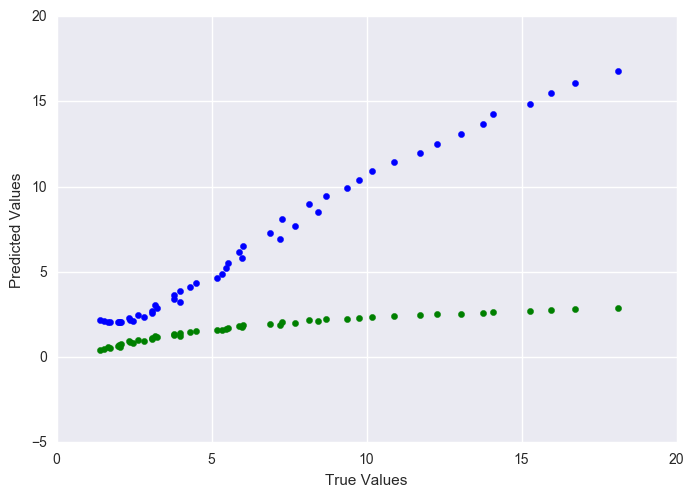

In [30]:
# Plot true values versus the predictions
plt.scatter(df['y'], results.predict(), color="g", label="Linear")
plt.scatter(df['y'], results2.predict(), color="b", label="Quadratic")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

Although it's a little hard to tell from the plot (since both fits are good), the blue (quadratic) fit is closer to "y=x", indicating a closer agreement with the true values and the model's predictions.

Higher order polynomial regressions are as easy as increasing the exponent parameter in `numpy.vander`.

# Exponential functions

We can also transform our data before applying linear regression. This allows us to fit functions such as exponentials of the form $y=A e^{k x}$ using linear regression. Here's some exponentially distributed data.

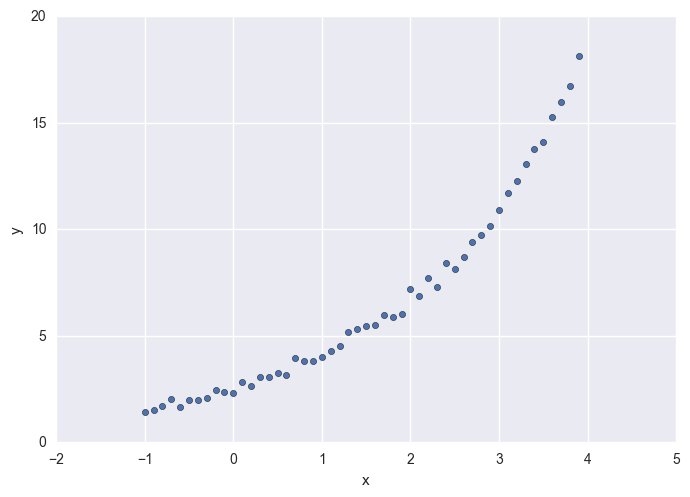

In [25]:
func = lambda x: 2.5 * np.exp(0.5 * x) + stats.norm.rvs(0, 0.3)
df = pd.DataFrame()
df["x"] = np.arange(-1, 4, 0.1)
df["y"] = list(map(func, df["x"]))
df.plot.scatter(x='x', y='y')

If we take the log of the `y`-variable we get something more linear.

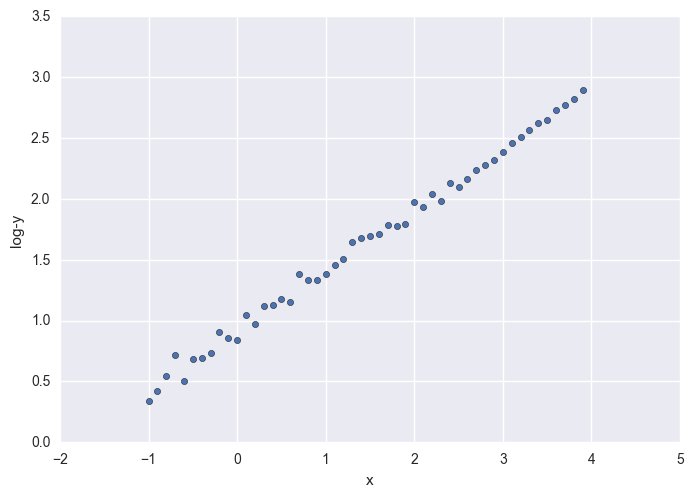

In [26]:
df["log-y"] = np.log(df["y"])
df.plot.scatter(x='x', y='log-y')

We can then use linear regression to determine $k$ and $\log A$, since taking the $\log$ of both sides of $y = A e^{k x}$ gives us $\log y = \log A + k x$.

In [28]:
X = df["x"]
X = sm.add_constant(X)
y = df["log-y"]

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log-y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9291.
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.33e-56
Time:                        19:54:43   Log-Likelihood:                 77.356
No. Observations:                  50   AIC:                            -150.7
Df Residuals:                      48   BIC:                            -146.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9175      0.011     87.061      0.000       0.896       0.939
x              0.4966      0.005     96.391      0.000       0.486       0.507
==============================================================================
Omnibus:                        2.482   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.607
Skew:                           0.399   Prob(JB):                        0.448
Kurtosis:                       3.366   Cond. No.                         3.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see the fit is very good.